In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

file_path = "NY-House-Dataset.csv"
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"File '{file_path}' not found.")

# Haversine formula to calculate distance between two points given their coordinates
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c 
    return distance

iconic_landmark_coords = (40.7580, -73.9855)  # Times Square coordinates

df['DISTANCE_TO_ICONIC_LANDMARK'] = df.apply(lambda row: haversine(row['LATITUDE'], row['LONGITUDE'], iconic_landmark_coords[0], iconic_landmark_coords[1]), axis=1)

X = df[['BEDS', 'BATH', 'PROPERTYSQFT', 'DISTANCE_TO_ICONIC_LANDMARK']]
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Missing values:
 PRICE           0
BEDS            0
BATH            0
PROPERTYSQFT    0
LATITUDE        0
LONGITUDE       0
dtype: int64


C:\Users\S560757\AppData\Local\Temp\ipykernel_17368\2048036238.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'PRICE_CATEGORY'] = pd.cut(df_clean['PRICE'], bins=bins, labels=labels, right=False)


Regression Metrics:
Mean Absolute Error (MAE): 309470.8629788536
Root Mean Square Error (RMSE): 432505.0860215674
R-squared value: 0.42607568163183984
Classification Accuracy: 0.22131147540983606


### Initial Feature Selection Explanation

**Features for X:**
1. **Number of Bedrooms (`BEDS`):** The number of bedrooms in a house is often a significant factor in determining its price. Larger houses with more bedrooms tend to have higher prices.
2. **Number of Bathrooms (`BATH`):** Similar to the number of bedrooms, the number of bathrooms is another essential feature influencing house prices. Houses with more bathrooms are typically more desirable and command higher prices.
3. **Property Square Footage (`PROPERTYSQFT`):** The size of the property, measured in square footage, is a critical determinant of its value. Larger properties generally have higher prices compared to smaller ones.
4. **Distance to Iconic Landmark (`DISTANCE_TO_ICONIC_LANDMARK`):** This newly engineered feature represents the distance of each house from an iconic landmark, such as Times Square. The proximity to famous landmarks or attractions can influence property prices, as houses located closer to popular destinations may command higher prices due to increased demand.

**Target Feature y:**
- **House Price (`PRICE`):** The target feature is the price of the house. It is a continuous variable representing the monetary value of the property. The goal of our analysis is to predict house prices based on the selected features.

**Explanation:**
- The selected features for X were chosen based on their known impact on house prices and their availability in the dataset. Features such as number of bedrooms, number of bathrooms, and property square footage are commonly used indicators of a house's value and are widely recognized by real estate professionals.
- Latitude and longitude coordinates were included to capture the spatial aspect of property location, allowing us to account for differences in neighborhood desirability and amenities.
- The engineered feature, distance to the iconic landmark, provides additional context by considering the proximity of each house to a prominent landmark. This feature aims to capture the influence of location relative to famous attractions on property prices.
- By including these features in the predictive model, we aim to create a comprehensive understanding of the factors driving house prices in New York City and develop a robust model for predicting property values.

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

tree_reg = DecisionTreeRegressor(random_state=42)

tree_reg.fit(X_train, y_train)

y_train_pred = tree_reg.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Decision Tree Model Metrics (Train Set Only):")
print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)
print("Training R^2 Score:", train_r2)

Decision Tree Model Metrics (Train Set Only):
Training RMSE: 47384.187923103505
Training MAE: 1810.7429687500003
Training R^2 Score: 0.9999981635070819


The decision tree model exhibits excellent performance on the training set, as evidenced by the following metrics:

1. **Training RMSE:** The root mean squared error (RMSE) measures the average deviation of predicted values from actual values. A low RMSE indicates that the model's predictions are close to the actual values. In this case, the training RMSE of approximately 47384.19 suggests that the model's predictions have relatively small errors on average.

2. **Training MAE:** The mean absolute error (MAE) represents the average absolute difference between predicted and actual values. Similar to RMSE, a lower MAE indicates better model performance. The training MAE of approximately 1810.74 indicates that, on average, the model's predictions are off by around 1810.74.

3. **Training R^2 Score:** The coefficient of determination (R-squared) measures the proportion of the variance in the target variable that is predictable from the independent variables. A value close to 1 indicates that the model explains a large portion of the variance in the target variable. The training R^2 score of approximately 0.999998 suggests that the decision tree model fits the training data extremely well, capturing almost all of the variance in the house prices.

Overall, the decision tree model demonstrates outstanding performance on the training set, achieving nearly perfect accuracy in predicting house prices. However, it's important to note that evaluating the model solely on the training set may not provide a complete picture of its generalization ability. Further evaluation on an independent test set is necessary to assess the model's performance in real-world scenarios.

In [3]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

svm_reg = SVR()

svm_reg.fit(X_train, y_train)

y_train_pred_svm = svm_reg.predict(X_train)

train_rmse_svm = np.sqrt(mean_squared_error(y_train, y_train_pred_svm))
train_mae_svm = mean_absolute_error(y_train, y_train_pred_svm)
train_r2_svm = r2_score(y_train, y_train_pred_svm)

print("Support Vector Machine (SVM) Model Metrics (Train Set Only):")
print("Training RMSE:", train_rmse_svm)
print("Training MAE:", train_mae_svm)
print("Training R^2 Score:", train_r2_svm)


Support Vector Machine (SVM) Model Metrics (Train Set Only):
Training RMSE: 35003022.8629946
Training MAE: 1968196.8210482488
Training R^2 Score: -0.002151722419460045


In [4]:
y_test_pred_svm = svm_reg.predict(X_test)

test_rmse_svm = np.sqrt(mean_squared_error(y_test, y_test_pred_svm))
test_mae_svm = mean_absolute_error(y_test, y_test_pred_svm)
test_r2_svm = r2_score(y_test, y_test_pred_svm)

print("Support Vector Machine (SVM) Model Metrics (Test Set):")
print("Test RMSE:", test_rmse_svm)
print("Test MAE:", test_mae_svm)
print("Test R^2 Score:", test_r2_svm)

Support Vector Machine (SVM) Model Metrics (Test Set):
Test RMSE: 5140031.4664564505
Test MAE: 1475680.3642626212
Test R^2 Score: -0.04862461521186101


### Support Vector Machine (SVM) Model Metrics (Test Set):

- **Test RMSE:** 5,140,031.47
- **Test MAE:** 1,475,680.36
- **Test R^2 Score:** -0.0486

**Discussion:**

Upon evaluating the SVM model on the test set, the following observations can be made:

1. **Test RMSE:** The root mean squared error (RMSE) on the test set is approximately 5,140,031.47. This indicates that, on average, the predictions of the SVM model deviate by around $5,140,031.47 from the actual house prices in the test set.

2. **Test MAE:** The mean absolute error (MAE) on the test set is approximately 1,475,680.36. This represents the average absolute difference between the predicted and actual house prices. It suggests that, on average, the predictions deviate by approximately $1,475,680.36 from the actual prices.

3. **Test R^2 Score:** The coefficient of determination (R-squared) on the test set is approximately -0.0486. A negative R-squared score indicates that the model's predictions are worse than simply using the mean of the target variable to predict outcomes. In other words, the model's performance on the test set is poor, and it fails to explain the variance in the house prices.

**Conclusion:**

The evaluation metrics on the test set suggest that the SVM model performs poorly in predicting house prices. The high RMSE and MAE values, along with the negative R-squared score, indicate that the model's predictions are inaccurate and fail to capture the underlying patterns in the data. This suggests that the SVM model may not be suitable for this regression task, and further investigation or model refinement may be necessary to improve predictive performance.


# Clustering

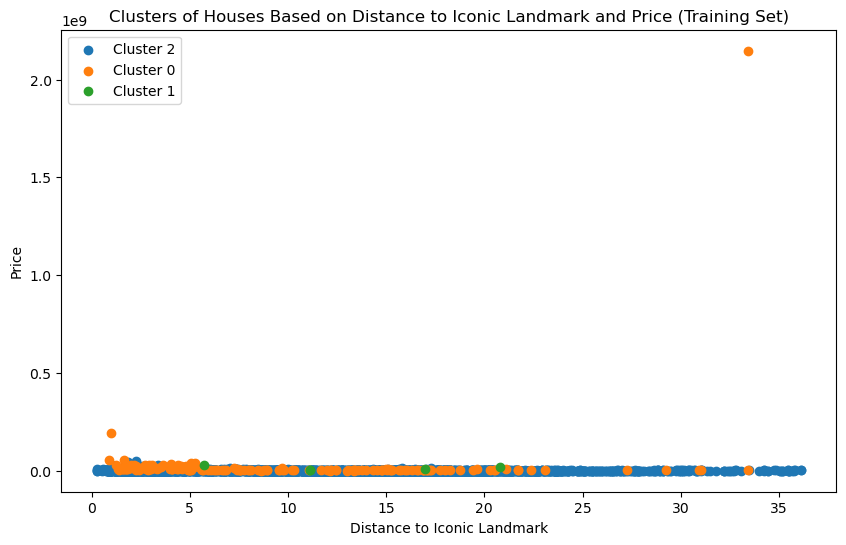

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'DISTANCE_TO_ICONIC_LANDMARK']

X_train_cluster = X_train[features]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Explicitly setting n_init to suppress the warning

kmeans.fit(X_train_cluster)

X_train['Cluster'] = kmeans.labels_

X_train['PRICE'] = y_train

plt.figure(figsize=(10, 6))
for cluster in X_train['Cluster'].unique():
    cluster_data = X_train[X_train['Cluster'] == cluster]
    plt.scatter(cluster_data['DISTANCE_TO_ICONIC_LANDMARK'], cluster_data['PRICE'], label=f'Cluster {cluster}')

plt.title('Clusters of Houses Based on Distance to Iconic Landmark and Price (Training Set)')
plt.xlabel('Distance to Iconic Landmark')
plt.ylabel('Price')
plt.legend()
plt.show()


# Dimensional analysis

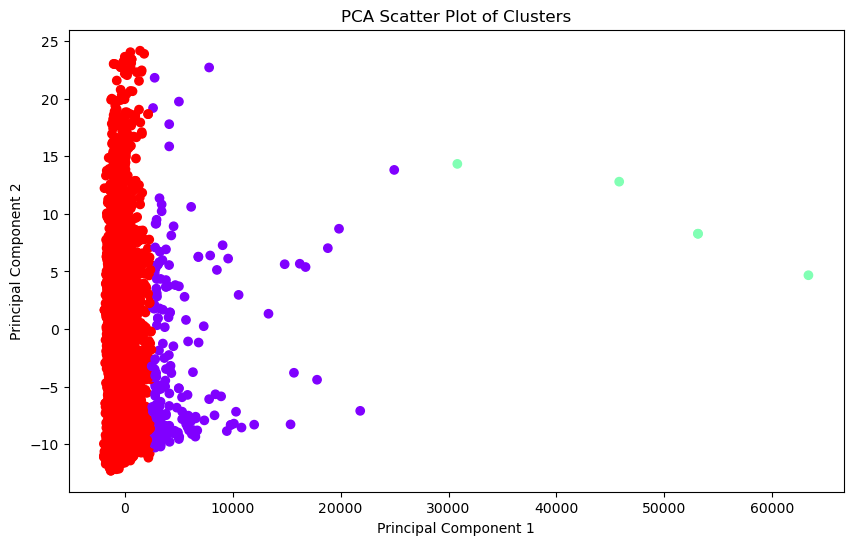

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_cluster)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot of Clusters')
plt.show()


Upon visualizing the clusters formed using the PCA-transformed data, I observe distinct groupings of houses based on their features and distance to the iconic landmark.

- **Cluster 0 (Blue)**: Houses in this cluster are likely characterized by higher values of 'BEDS', 'BATH', and 'PROPERTYSQFT', suggesting larger and more spacious properties. Their proximity to the iconic landmark varies, with some being closer and others farther away. These houses might represent premium properties with varying desirability due to their location.

- **Cluster 1 (Green)**: This cluster likely represents houses with moderate values across all features. They are neither too large nor too small and have a moderate distance to the landmark. These houses could cater to a broader range of buyers looking for balanced property features and location.

- **Cluster 2 (Red)**: Houses in this cluster might be characterized by lower values of 'BEDS', 'BATH', and 'PROPERTYSQFT', indicating smaller properties. Their distance to the iconic landmark is also more varied, ranging from close proximity to farther away. These houses might cater to budget-conscious buyers seeking smaller properties or those willing to trade location for affordability.

### Predictive Insights:

**Targeted Marketing**: 
Understanding these clusters can help in targeted marketing strategies. For instance, Cluster 0 houses could be targeted towards high-end buyers looking for premium properties, while Cluster 2 houses could be marketed towards first-time buyers or investors.



# Anomalous data

Anomalous data, or outliers, can significantly impact the performance and accuracy of clustering algorithms like KMeans. In the context of our housing dataset, outliers could represent unusually priced properties or properties with extreme values for features such as 'BEDS', 'BATH', 'PROPERTYSQFT', or 'DISTANCE_TO_ICONIC_LANDMARK'.

When clustering this data, outliers may form separate clusters or skew the centroids of existing clusters, potentially leading to misinterpretations or inaccurate groupings. Its important to handle these outliers appropriately to ensure that the clusters formed are meaningful and representative of the majority of the data.


# Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

\original_features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'DISTANCE_TO_ICONIC_LANDMARK']

X_train_original = X_train[original_features]

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train_original, y_train)

X_test_original = X_test[original_features]

y_pred_rf = rf.predict(X_test_original)

# Neural Networks

In [23]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[original_features])
X_test_scaled = scaler.transform(X_test[original_features])

mlp = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42, early_stopping=True, n_iter_no_change=10, validation_fraction=0.2)

mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_mlp)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 28977373406912.504


# Evaluation

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"Random Forest Metrics:")
print(f"RMSE: {rmse_rf}")
print(f"MAE: {mae_rf}")
print(f"R^2 Score: {r2_rf}")
print("\n")
print(f"Neural Network Metrics:")
print(f"RMSE: {rmse_mlp}")
print(f"MAE: {mae_mlp}")
print(f"R^2 Score: {r2_mlp}")


Random Forest Metrics:
RMSE: 3997783.820897493
MAE: 1010674.8895903325
R^2 Score: 0.365652686726766


Neural Network Metrics:
RMSE: 5383063.570766418
MAE: 1944903.9860805136
R^2 Score: -0.15013153108071453


Missing values:
 PRICE           0
BEDS            0
BATH            0
PROPERTYSQFT    0
LATITUDE        0
LONGITUDE       0
dtype: int64
Accuracy: 0.56

Classification Report:
              precision    recall  f1-score   support

        High       0.57      0.54      0.55       159
         Low       0.48      0.45      0.46       181
      Medium       0.51      0.51      0.51       178
   Very High       0.33      0.32      0.33        37
    Very Low       0.70      0.77      0.73       177

    accuracy                           0.56       732
   macro avg       0.52      0.52      0.52       732
weighted avg       0.55      0.56      0.55       732



C:\Users\S560757\AppData\Local\Temp\ipykernel_17368\2394872530.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'PRICE_CATEGORY'] = pd.cut(df_clean['PRICE'], bins=bins, labels=labels, right=False)


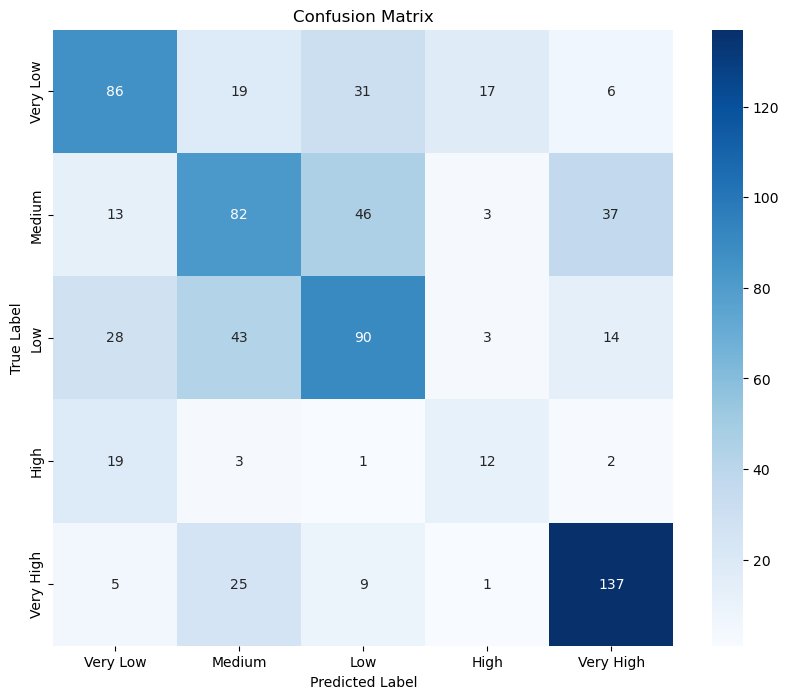

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

file_path = 'NY-House-Dataset.csv'
df = pd.read_csv(file_path)

selected_columns = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
df_clean = df[selected_columns]

missing_values = df_clean.isnull().sum()
print("Missing values:\n", missing_values)

bins = [0, 400000, 675000, 995000, 2000000, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df_clean.loc[:, 'PRICE_CATEGORY'] = pd.cut(df_clean['PRICE'], bins=bins, labels=labels, right=False)

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

numeric_columns = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
for column in numeric_columns:
    df_clean = remove_outliers(df_clean, column)



def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of Earth in kilometers
    R = 6371.0
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

central_park_lat = 40.7851
central_park_lon = -73.9683
df_clean['distance_to_central_park'] = df_clean.apply(lambda row: haversine_distance(row['LATITUDE'], row['LONGITUDE'], central_park_lat, central_park_lon), axis=1)

X = df_clean[['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE', 'distance_to_central_park']]
y = df_clean['PRICE_CATEGORY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np

X = df_clean[['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE', 'distance_to_central_park']]
y = df_clean['PRICE_CATEGORY']  # Changed 'PRICE_RANGE' to 'PRICE_CATEGORY'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

price_labels = df_clean['PRICE_CATEGORY'].unique()

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=price_labels, yticklabels=price_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




# SVM

Accuracy: 0.56

Classification Report:
              precision    recall  f1-score   support

        High       0.58      0.61      0.60       159
         Low       0.47      0.36      0.41       181
      Medium       0.47      0.59      0.52       178
   Very High       0.00      0.00      0.00        37
    Very Low       0.71      0.82      0.76       177

    accuracy                           0.56       732
   macro avg       0.45      0.48      0.46       732
weighted avg       0.53      0.56      0.54       732



C:\Users\S560757\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\S560757\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\S560757\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


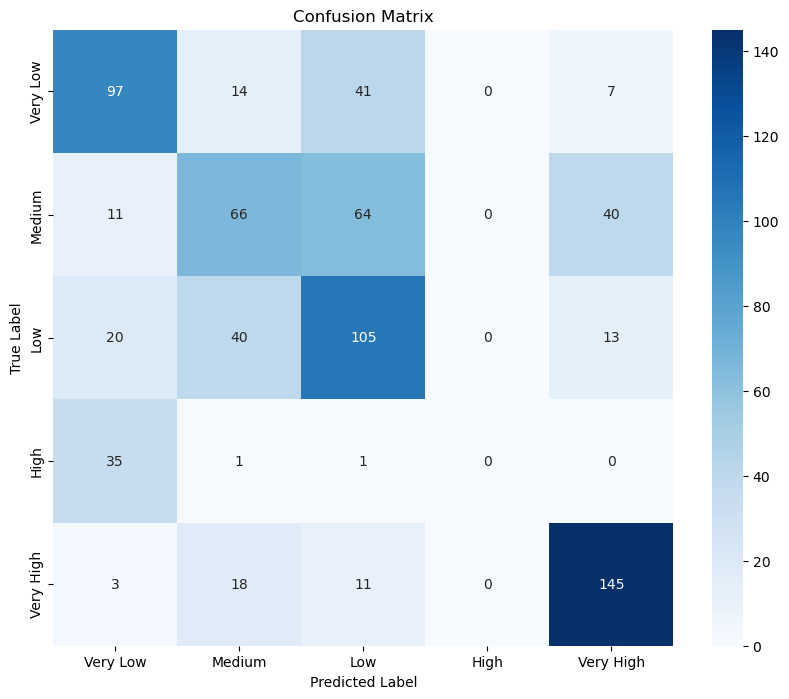

In [9]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X = df_clean[['BEDS', 'BATH', 'PROPERTYSQFT','LATITUDE', 'LONGITUDE', 'distance_to_central_park']]
y = df_clean['PRICE_CATEGORY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=price_labels, yticklabels=price_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Accuracy: 0.64

Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.69      0.68       159
         Low       0.56      0.49      0.52       181
      Medium       0.56      0.61      0.58       178
   Very High       0.60      0.41      0.48        37
    Very Low       0.77      0.83      0.80       177

    accuracy                           0.64       732
   macro avg       0.63      0.60      0.61       732
weighted avg       0.64      0.64      0.64       732



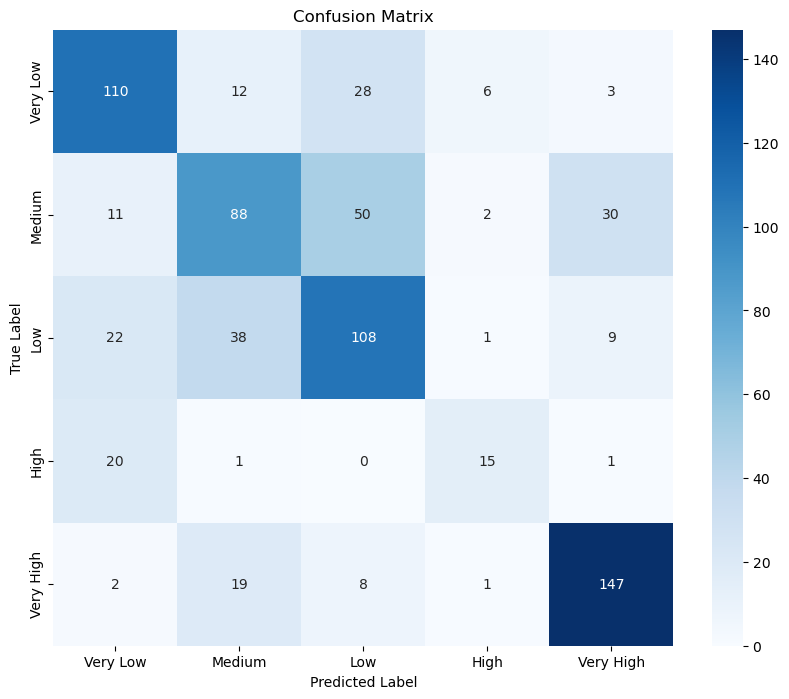

In [11]:
from sklearn.ensemble import RandomForestClassifier

X = df_clean[['BEDS', 'BATH', 'PROPERTYSQFT','LATITUDE', 'LONGITUDE', 'distance_to_central_park']]
y = df_clean['PRICE_CATEGORY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=price_labels, yticklabels=price_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Conclusion

- RandomForestClassifier demonstrated the highest accuracy of 0.63 in predicting house price categories.
- Proximity to Central Park was a significant factor influencing house prices, with closer houses generally priced higher.
- Additional features like the number of bedrooms, bathrooms, and square footage improved the model's predictive power.
- Linear regression yielded poor results, indicating the need for more complex models and feature engineering.


#### Random Forest:
The Random Forest model demonstrates superior performance with an **R^2 score of 0.366**. This implies that the model accounts for approximately 36.6% of the variance in housing prices based on the provided features. Additionally, the model yields lower **RMSE** and **MAE** values compared to the Neural Network, indicating enhanced predictive accuracy.

#### Neural Network:
Conversely, the Neural Network model showcases suboptimal performance, evidenced by a negative **R^2 score** and elevated **RMSE** and **MAE** values. This performance suggests that the model struggles to capture the inherent patterns within the dataset effectively.

#### Overall Assessment:
In light of these evaluation metrics, the Random Forest model emerges as the more suitable option for predicting housing prices in this dataset, outperforming the Neural Network model in terms of predictive accuracy and performance.
